In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
titan_dataset = pd.read_csv("Titanic-Dataset.csv")
print(titan_dataset.head(10))
print("Data types of  Dataset",titan_dataset.columns)
print(titan_dataset.describe())
print(titan_dataset.isnull().sum())
age_array = titan_dataset["Age"].values
mean_age = np.nanmean(age_array)
print("Mean Age of Passengers: ",mean_age)
titan_dataset2 = np.where(np.isnan(age_array),mean_age, age_array)
print(titan_dataset2)
most_common_port = titan_dataset['Embarked'].mode()[0]
titan_dataset['Embarked'] = titan_dataset['Embarked'].fillna(most_common_port)
titan_dataset['Embarked']
passenger_count = titan_dataset['PassengerId'].count()
print(f"The onboard Passenger are: {passenger_count}")
fare_array = titan_dataset["Fare"].values
mean_fare = np.nanmean(fare_array)
print(f"The Average of fare: ",mean_fare)
# male_passengers = np.count(titan_dataset[titan_dataset['Sex'] != 'male'])
# print(f"these males were on the titan: {male_passengers['Sex'].head(10)}")
# Count males and females
gender_counts = titan_dataset['Sex'].value_counts()
print(gender_counts)
servived_passengers = titan_dataset['Survived'].value_counts()
print(f"Servived: {servived_passengers[: :]}")
# Group passengers by class and survival
survival_by_class = titan_dataset.groupby(['Pclass', 'Survived']).size().unstack()
print(survival_by_class)
# Create Age Groups
bins = [0, 12, 19, 40, 100]
labels = ['Child', 'Teen', 'Adult', 'Senior']
titan_dataset['AgeGroup'] = pd.cut(titan_dataset['Age'], bins=bins, labels=labels, right=True)

# Survival counts by AgeGroup
survival_by_agegroup = titan_dataset.groupby(['AgeGroup', 'Survived']).size().unstack()
print(f"Survived by age groups: {survival_by_agegroup}")

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

C:\Users\HP\AppData\Local\Temp\ipykernel_10844\2260063601.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_agegroup = titan_dataset.groupby(['AgeGroup', 'Survived']).size().unstack()


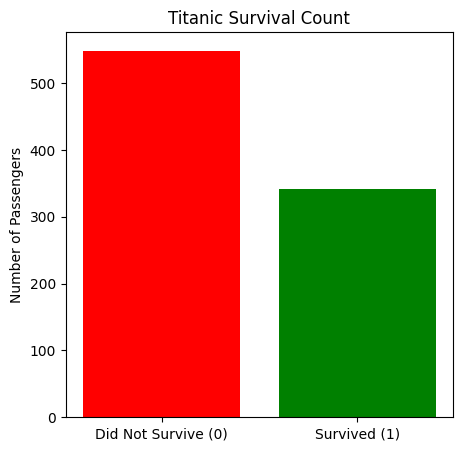

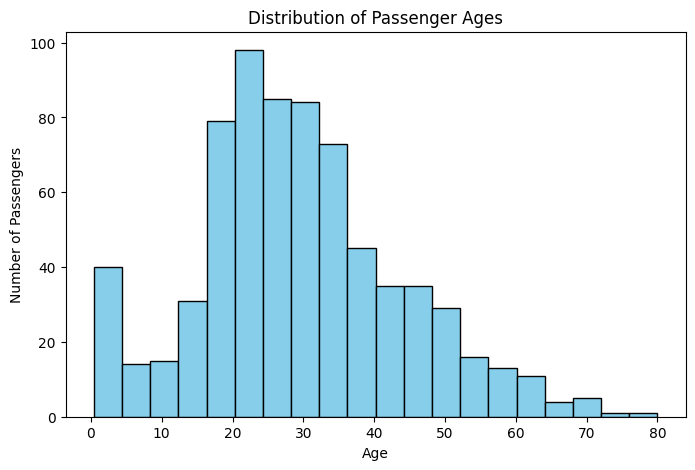

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Matplotlib
survival_counts = titan_dataset['Survived'].value_counts()
plt.figure(figsize=(5,5))
plt.bar(survival_counts.index, survival_counts.values, color=['red','green'])
plt.xticks([0,1], ['Did Not Survive (0)', 'Survived (1)'])
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival Count")
plt.show()
plt.figure(figsize=(8,5))
plt.hist(titan_dataset['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Distribution of Passenger Ages")
plt.show()

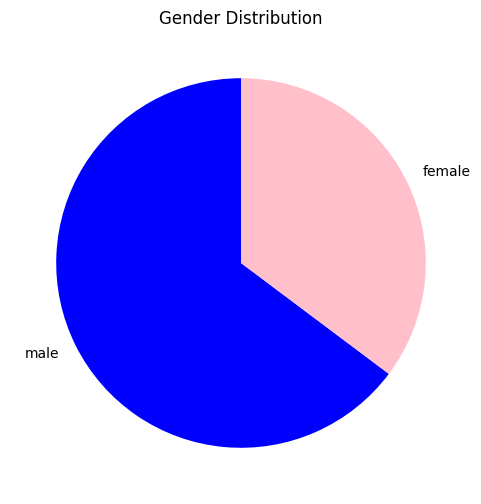

In [6]:
gender_counts = titan_dataset['Sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, startangle=90, colors=['blue','pink'])
plt.title("Gender Distribution")
plt.show()

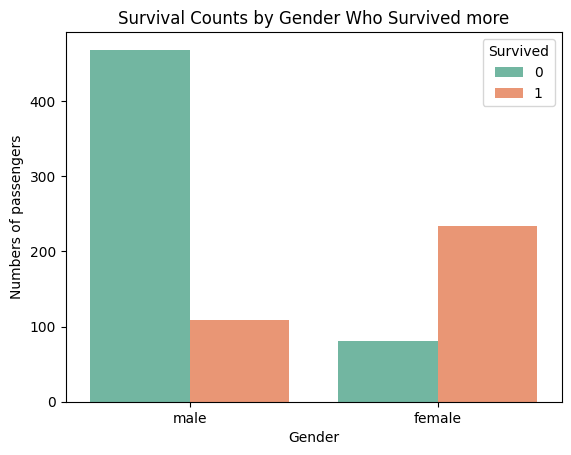

In [7]:
# Seaborn
sns.countplot(data = titan_dataset, x = 'Sex', hue = 'Survived',  palette="Set2")
plt.title("Survival Counts by Gender Who Survived more")
plt.ylabel("Numbers of passengers")
plt.xlabel("Gender")
plt.show()

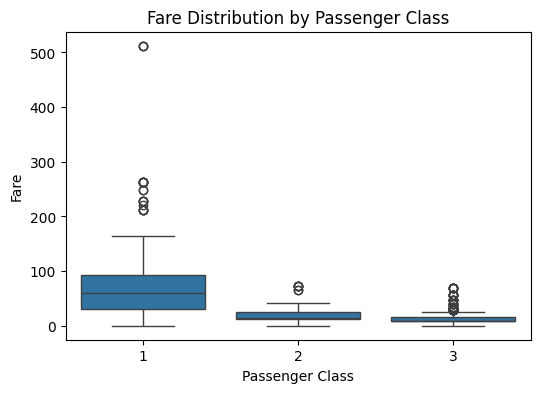

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(data= titan_dataset, x='Pclass', y='Fare')
plt.title("Fare Distribution by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

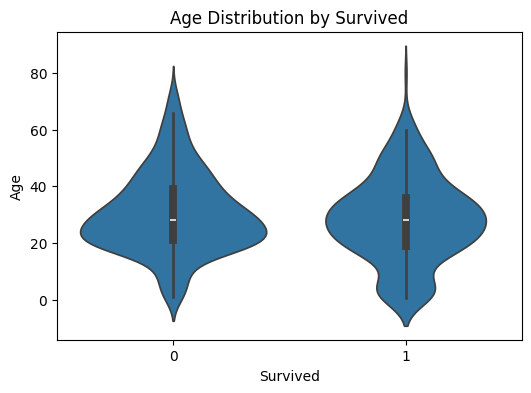

In [9]:
# Vilonplot
plt.figure(figsize=(6,4))
sns.violinplot(data=titan_dataset,x='Survived',y='Age')
plt.title("Age Distribution by Survived")
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

<Axes: >

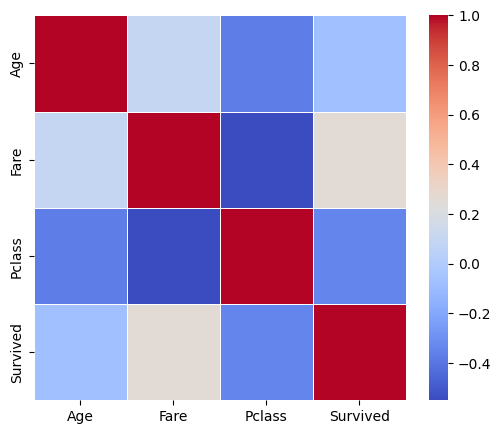

In [10]:
# Heatmap
plt.figure(figsize=(6,5))
corr = titan_dataset[['Age', 'Fare', 'Pclass', 'Survived']].corr()
sns.heatmap(corr, cmap="coolwarm", linewidths=0.5)


# Probability Theory
## Emprical Probability

Survived Passengers: Survived
1    342
Name: count, dtype: int64
Probability of passengers Survived Survived
1    0.383838
Name: count, dtype: float64
Females Passengers Survived: 233[0]
Total numbers of females: 314
Emperical probablility of females survived 74.20382165605095
Males Passengers Survived: 109[0]
Total numbers of males: 577
Emperical probablility of males survived 18.890814558058924
Survival Probability by Class (%):
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


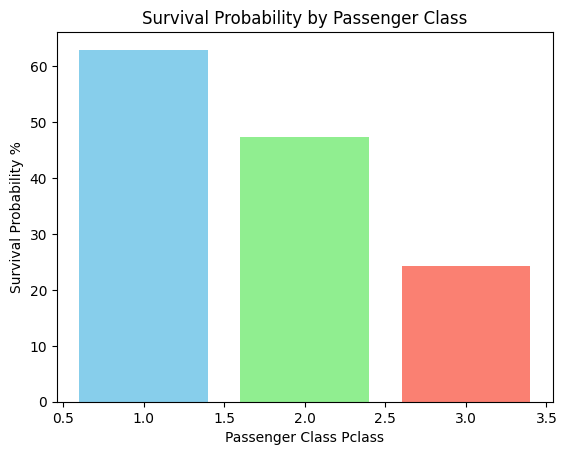

Random Chance of Survival: 50.0 %
Chance of survival by class: [33.33333333333333, 33.33333333333333, 33.33333333333333]
Chance by gender of Survival: 50.0 %


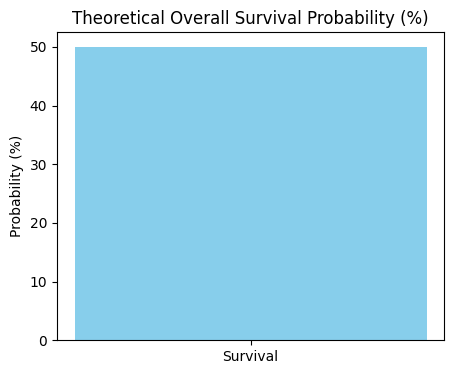

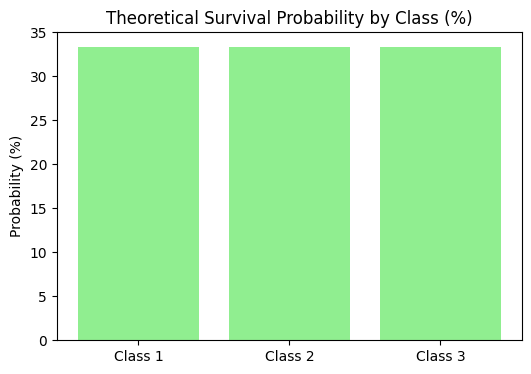

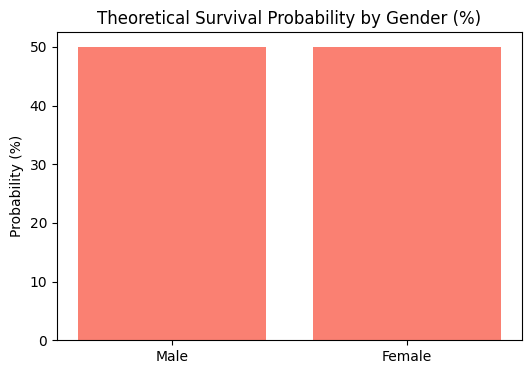

In [26]:
# Emperical Probability
# survived passengers
pass_survived = titan_dataset['Survived'].value_counts()
survived = pass_survived[1:]
print(f"Survived Passengers: {survived}")

# total no of passengers
total_passengers = titan_dataset['Survived'].value_counts().sum()
total_passengers

#probability of suvivals passengers
p_survived = survived / total_passengers
print(f"Probability of passengers Survived {p_survived}")

# probability of female passengers survived
female_survived = titan_dataset[(titan_dataset['Sex'] == 'female') & (titan_dataset['Survived'] == 1)].shape[0]
print(f"Females Passengers Survived: {female_survived}[0]")
# Total females as a passengers
total_females = titan_dataset[titan_dataset['Sex'] == 'female'].shape[0]
#total_females = (titan_dataset['Sex'] == 'female').sum()
print(f"Total numbers of females: {total_females}")
# probability
p_survived = female_survived / total_females *100
print(f"Emperical probablility of females survived {p_survived}")

# probability of male passengers survived
male_survived = titan_dataset[(titan_dataset['Sex'] == 'male') & (titan_dataset['Survived'] == 1)].shape[0]
print(f"Males Passengers Survived: {male_survived}[0]")
# Total females as a passengers
total_males = titan_dataset[titan_dataset['Sex'] == 'male'].shape[0]
#total_females = (titan_dataset['Sex'] == 'female').sum()
print(f"Total numbers of males: {total_males}")

#probability 
p_survived = male_survived / total_males *100
print(f"Emperical probablility of males survived {p_survived}")

# Calculate probabilities of survival by class
survival_prob_by_class = titan_dataset.groupby('Pclass')['Survived'].mean() * 100

print("Survival Probability by Class (%):")
print(survival_prob_by_class)

#survival plot by plt
survival_plt = titan_dataset.groupby('Pclass')['Survived'].mean() * 100

plt.bar(survival_plt.index, survival_plt.values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Passenger Class Pclass")
plt.ylabel("Survival Probability %")
plt.title("Survival Probability by Passenger Class")
plt.show()


#Theoritical probability
random_survived = 0.5*100
class_chance = [1/3*100,1/3*100,1/3*100]
gender_survival = 0.5 * 100
print(f"Random Chance of Survival: {random_survived} %")
print(f"Chance of survival by class: {class_chance}")
print(f"Chance by gender of Survival: {gender_survival} %")


# Theoritical probability visualization
# by random
plt.figure(figsize=(5,4))
plt.bar(["Survival"], [random_survived], color="skyblue")
plt.title("Theoretical Overall Survival Probability (%)")
plt.ylabel("Probability (%)")
plt.show()

# by classes 
classes = ["Class 1", "Class 2", "Class 3"]
plt.figure(figsize=(6,4))
plt.bar(classes, class_chance, color="lightgreen")
plt.title("Theoretical Survival Probability by Class (%)")
plt.ylabel("Probability (%)")
plt.show()
# by genders
genders = ["Male", "Female"]
plt.figure(figsize=(6,4))
plt.bar(genders, [gender_survival, gender_survival], color="salmon")
plt.title("Theoretical Survival Probability by Gender (%)")
plt.ylabel("Probability (%)")
plt.show()